In [13]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving spam.csv to spam (1).csv
User uploaded file "spam.csv" with length 503663 bytes


# Reading File

In [14]:
import pandas as pd
df = pd.read_csv ('spam.csv',encoding = "ISO-8859-1")
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


# Begin data exploration !


Done by Brinda

In [15]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [16]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [17]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

Text(0, 0.5, 'Number of Data points')

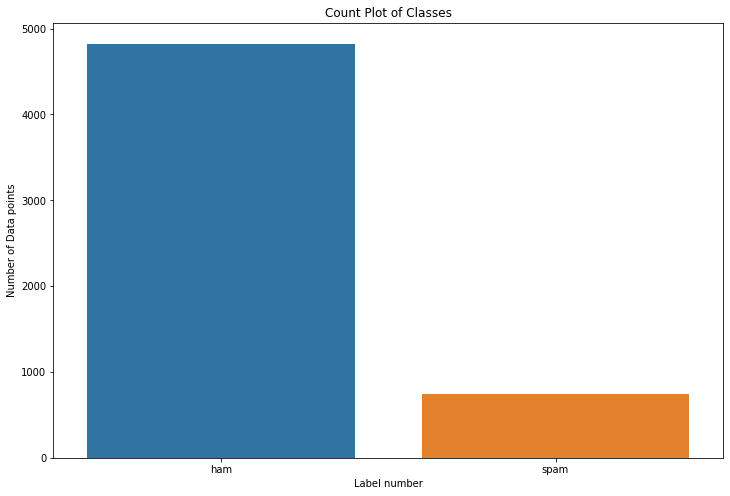

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
fg = sns.countplot(x= df['v1'])
fg.set_title("Count Plot of Classes")
fg.set_xlabel("Label number")
fg.set_ylabel("Number of Data points")

In [19]:
df['label_num'] = df.v1.map({'ham':0, 'spam':1})
df['length'] = df['v2'].apply(len)
df

,v1,v2,label_num,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


Done by Caroline

In [20]:
# Check statistics of length: real messages may have more variation in length
df.loc[df['v1'] == 'ham'].describe()

,label_num,length
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [21]:
df.loc[df['v1'] == 'spam'].describe()

,label_num,length
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


Done by Atharav

In [22]:
# looking for null values in data set
df.subset=df[['v1','v2']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [23]:
df.subset.isna().sum()

v1    0
v2    0
dtype: int64

Done by Vinh

In [24]:
#add your lines of code here

# Preprocessing 

Done by Caroline

In [25]:
# Some common text preprocessing steps
import string

def remove_punctuation(text):
  # If doing this, need to decide how to deal with contraction words beforehand
  # Or opt not to remove ' 
  for punct in string.punctuation:
    text = text.replace(punct, " ")
  return text

# Lower case
df['preprocess_text'] = df['v2'] # Keeping original text in case needed
df['preprocess_text'] = df['preprocess_text'].str.lower()
# Remove punctuation
# NOTE: We may not want to remove all punctuation as links, emails, or other special characters might
# indicate spam messages. Hence I preserved the original text phrases.
df['preprocess_text'] = df['preprocess_text'].apply(lambda text: remove_punctuation(text))

from collections import Counter
print("Top 100 words")
print(Counter(" ".join(df["preprocess_text"]).split()).most_common(100))
# Printing out the top common words reveals that it would be a good idea to remove stop words
# from dataset during more preprocessing - we can do this at next project stage.

df

Top 100 words
[('i', 2990), ('to', 2242), ('you', 2239), ('a', 1433), ('the', 1328), ('u', 1191), ('and', 979), ('in', 898), ('is', 890), ('me', 802), ('my', 762), ('it', 741), ('for', 704), ('your', 681), ('of', 620), ('call', 591), ('have', 575), ('that', 574), ('s', 559), ('on', 537), ('2', 515), ('now', 502), ('are', 494), ('can', 468), ('so', 461), ('t', 454), ('but', 441), ('not', 439), ('m', 424), ('or', 422), ('do', 409), ('at', 404), ('we', 401), ('get', 391), ('be', 387), ('if', 386), ('will', 385), ('ur', 385), ('with', 381), ('just', 371), ('no', 367), ('this', 341), ('gt', 318), ('4', 317), ('lt', 316), ('how', 312), ('up', 306), ('when', 299), ('ok', 292), ('what', 289), ('free', 284), ('from', 284), ('go', 280), ('all', 275), ('out', 274), ('ll', 263), ('know', 261), ('like', 245), ('good', 245), ('then', 243), ('got', 239), ('there', 232), ('was', 231), ('he', 230), ('day', 229), ('come', 229), ('its', 227), ('am', 225), ('time', 220), ('only', 218), ('love', 209), ('se

,v1,v2,label_num,length,preprocess_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go until jurong point crazy available only ...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah i don t think he goes to usf he lives aro...
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,this is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,will ì b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,pity was in mood for that so any other s...
5570,ham,The guy did some bitching but I acted like i'd...,0,125,the guy did some bitching but i acted like i d...


Done by Vinh

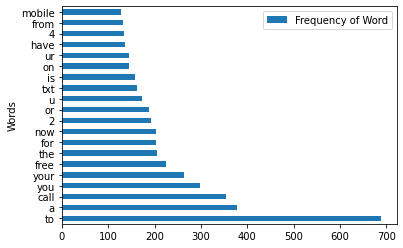

In [33]:
#spam messages
spam=df.loc[df['v1'] == 'spam']
spam_common=Counter(" ".join(spam["preprocess_text"]).split()).most_common(20)
spam_df=pd.DataFrame(spam_common)
spam_df.columns=['Words','Frequency of Word']
spam_df
spam_df.plot.barh(x='Words')

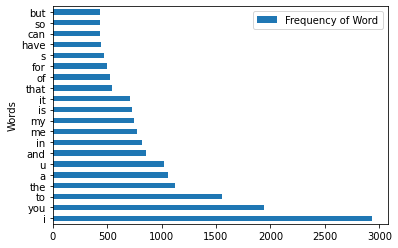

In [34]:
#ham messages
ham=df.loc[df['v1'] == 'ham']
ham_common=Counter(" ".join(ham["preprocess_text"]).split()).most_common(20)
ham_df=pd.DataFrame(ham_common)
ham_df.columns=['Words','Frequency of Word']
ham_df
ham_df.plot.barh(x='Words')

Looking at the graph, spam messages tend to have more words involving the person being messaged like "you", "your", "to" and actions like "call" and "txt". One word that is interesting in spam is the word "free". Many spam calls intice people through words like "free'

Done by Naomi

In [ ]:
#checking for certain substrings in the messages, finding the % that is spam
substring = 'free'

new=df.loc[df['preprocess_text'].str.contains(substring)]
spam=new.loc[new['v1'] == 'spam']
ham=new.loc[new['v1']=='ham']
percentage=len(spam)/len(new)*100
print(f'{percentage}% of messages containing the word free are spam')

75.09433962264151% of messages containing the word free are spam
